In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os 
os.chdir("drive/MyDrive/02456-protein-project2020/notebooks")

# Data exploration

In [3]:
# load packages 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#sns.set(style="white")
sns.set_style("white")

sns.set(rc={'figure.figsize':(5,5)}, style="white")
sns.set_palette(sns.color_palette("Paired"))


In [4]:
# import data set 
name = "BL-cytoC"
#name = "balanced900-BL"
#path = "data/balanced900_pfam_uniprot_BL.tsv" # change filename
path="data/BL-cytoC_mix.tsv"
data=pd.read_csv(path,sep='\t') # !!! make sure you have updated the values above! 
print("The number of sequences is: {}".format(data.shape[0]))

The number of sequences is: 14725


In [5]:
data["Protein families"].value_counts()

Cytochrome c family                                                  4634
Cytochrome c family, PsbV subfamily                                  1005
Cytochrome c family, PetJ subfamily                                   986
Class-D beta-lactamase family                                         900
Class-A beta-lactamase family                                         900
LysR transcriptional regulatory family                                900
Binding-protein-dependent transport system permease family            900
Hcp beta-lactamase family                                             900
Metallo-beta-lactamase superfamily, Class-B beta-lactamase family     900
Metallo-beta-lactamase superfamily, Glyoxalase II family              900
Peptidase S12 family, YfeW subfamily                                  900
Class-C beta-lactamase family                                         900
Name: Protein families, dtype: int64

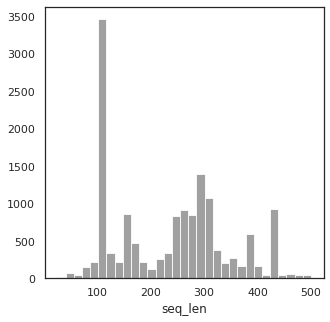

In [6]:
sns.histplot(x="seq_len", data=data, kde=False, color="grey")
#plt.title("Distribution of sequence length, {}".format(name))
plt.ylabel(None)
plt.savefig("visualization/data_exploration/seq-len-dist_{}.png".format(name))

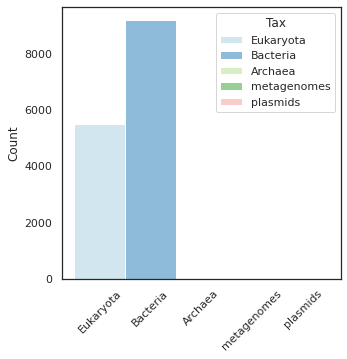

In [7]:
data["Taxonomic lineage (all) splitted"]=data["Taxonomic lineage (all)"].str.split(", ")

# get the different taxonomic levels for plotting
level2=pd.DataFrame(list(zip(*list(data["Taxonomic lineage (all) splitted"])))[1], columns=["Tax"])

sns.histplot(data=level2, x="Tax", hue="Tax")
plt.xlabel(None)
plt.xticks(rotation=45)
#plt.title("Distribution of domains of life")
plt.savefig("visualization/data_exploration/kingdoms-dist_{}.png".format(name), bbox_inches = "tight")

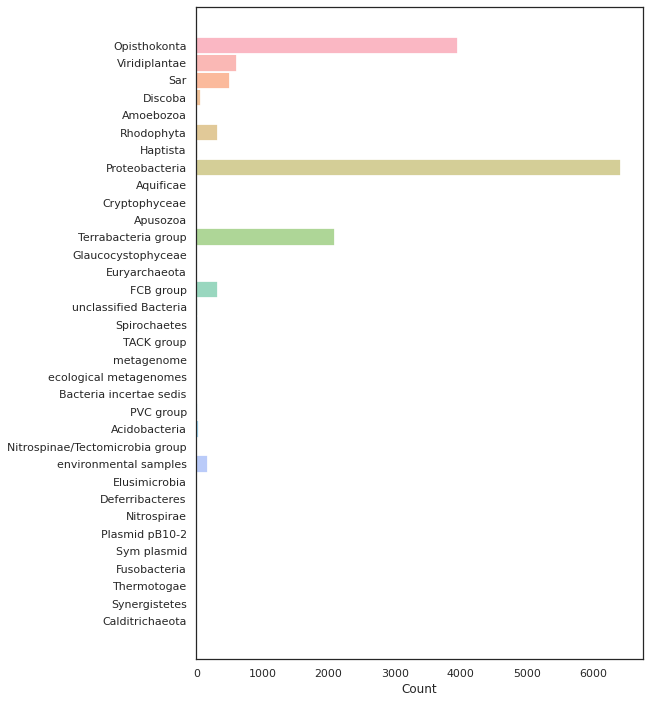

In [8]:

# get the different taxonomic levels for plotting
sns.set(rc={'figure.figsize':(8,12)}, style="white")
level3=pd.DataFrame(list(zip(*list(data["Taxonomic lineage (all) splitted"])))[2], columns=["tax3"])
sns.histplot(data=level3, y="tax3", hue="tax3", legend=False)
plt.ylabel(None)
#plt.title("Distribution of taxons")
plt.savefig("visualization/data_exploration/taxons-dist_{}.png".format(name), bbox_inches = "tight")

Text(0, 0.5, '')

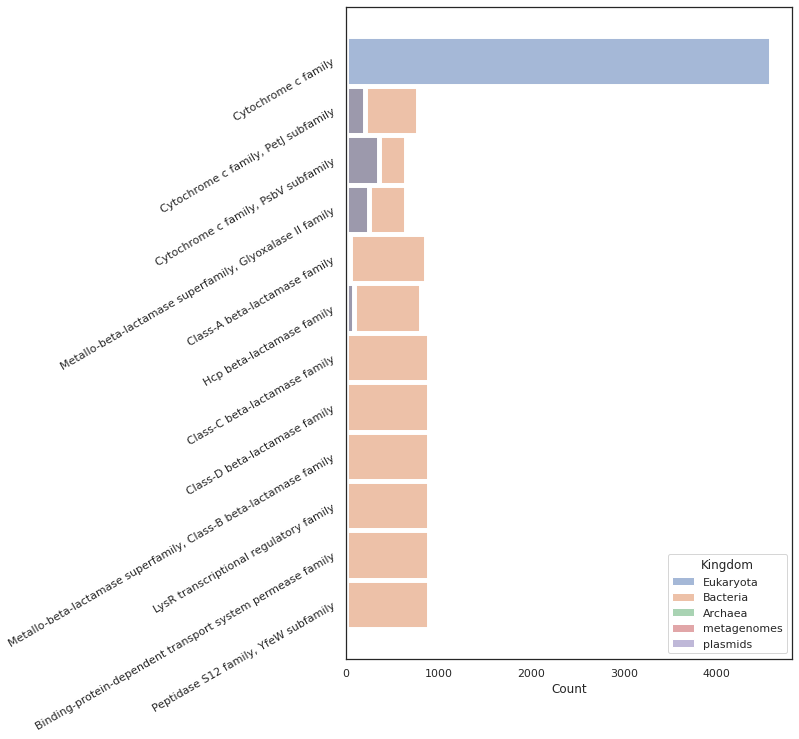

In [9]:
# Distribution of protein families
data["Kingdom"]=level2
sns.histplot(data=data, y="Protein families", hue="Kingdom")
plt.yticks(rotation=30)
plt.ylabel(None)

#plt.savefig("visualization/data_exploration/proteinfam-kingdom-dist_{}.png".format(name), bbox_inches = "tight")

No handles with labels found to put in legend.


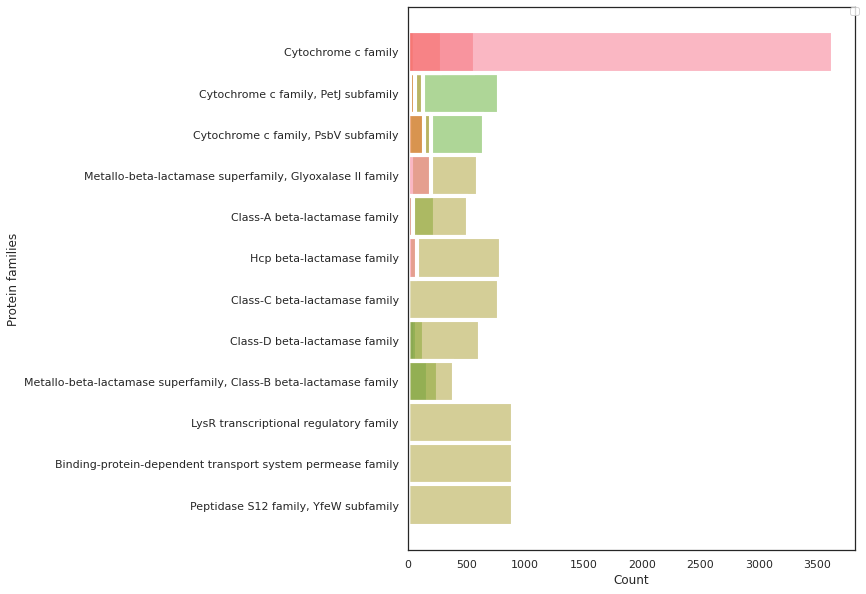

In [10]:
# Distribution of protein families
data["Taxon"]=level3
sns.set(rc={'figure.figsize':(8,10)}, style="white")
plt.ylabel(None)
sns.histplot(data=data, y="Protein families", hue="Taxon")
plt.legend(bbox_to_anchor=(1.01, 1),borderaxespad=0)
#plt.legend(bbox_to_anchor=(0, 1), loc='upper left', ncol=1)
#plt.savefig("visualization/data_exploration/proteinfam-dist-taxon_{}.png".format(name), bbox_inches = "tight")